# https://boosters.pro/champ_11

###  Клиенты Райффайзенбанка совершают покупки и снимают наличные в банкоматах с помощью карточек. Получив в виде обезличенных данных их историю транзакций, информацию о мерчантах (место, позволяющее принимать платежи с использованием банковской пластиковой карты), участники чемпионата должны предсказать две пары координат: дом и работу клиента. Оценкой качества решения в задаче является процент попаданий в окружность радиуса 0.02 градуса относительно реальных координат дома и работы.

###### terminal_id = идентификационный номер терминала
###### customer_id = идентификационный номер клиента
###### amount = количество потраченных средств за транзакцию
###### country = страна
###### currency = валюта
###### mcc = код категории продавца
###### transaction_date = дата транзакции
###### atm_address = адрес банкомата
###### pos_address = адрес установки pos-терминала
###### pos_address_lat = адрес установки pos-терминала широта
###### pos_address_lon = адрес установки pos-терминала долгота
###### work_add_lat = широта работы клиента
###### work_add_lon = долгота работы клиента
###### home_add_lat = широта дома клиента
###### home_add_lon = долгота дома клиента

In [1]:
import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
# mpl.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
pylab.rcParams[ 'figure.figsize' ] = 8,6

In [2]:
data = pd.read_csv('train_set.csv')

In [3]:
data.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


# Визуализация дат транзакций

In [4]:
import datetime
df = data
df = df[pd.notnull(df['transaction_date'])]
df['transaction_date'] = df['transaction_date'].astype(str)
df['transaction_date'] = df['transaction_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%A'))

Friday       202303
Thursday     178801
Tuesday      176014
Wednesday    174633
Saturday     173367
Monday       170167
Sunday       149405
Name: transaction_date, dtype: int64


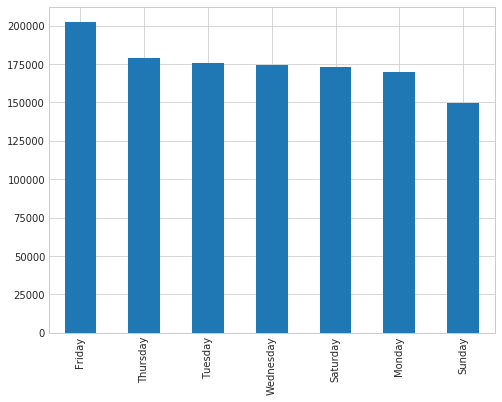

In [5]:
df['transaction_date'].value_counts().plot.bar()
print(df['transaction_date'].value_counts())

# Визуализация стран

RUS    1214411
RU        6356
DEU        238
CZE        215
THA        177
ITA        177
BGR        158
UKR        138
TUR        131
GEO        128
Name: country, dtype: int64


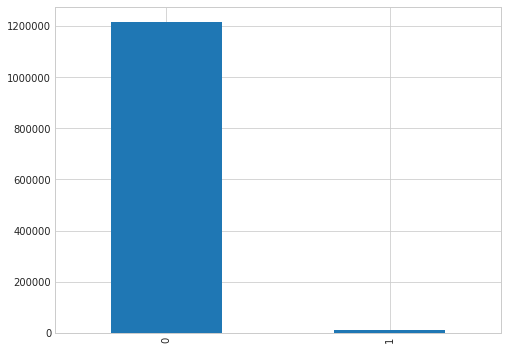

In [6]:
s = []
s.append(np.sum(df['country'] == 'RUS'))
s.append(np.sum(df['country'] != 'RUS'))
pd.Series(s).plot.bar()
print(df['country'].value_counts()[:10])

# Визуализация городов

MOSCOW           471883
ST-PETERSBURG    234642
EKATERINBURG      18063
NOVOSIBIRSK       15801
CHEREPOVETS       14732
N.NOVGOROD        13131
KRASNOYARSK       11005
KRASNODAR         10522
SAMARA             7928
KAZAN              7857
SOCHI              6895
OREL               6888
PODOLSK            6666
SYKTYVKAR          6632
CHEREPOVETS        6232
UFA                5535
ROSTOV-NA-DON      5408
KHIMKI             5393
NOVOSIBIRSK        5346
OMSK               5246
Name: city, dtype: int64


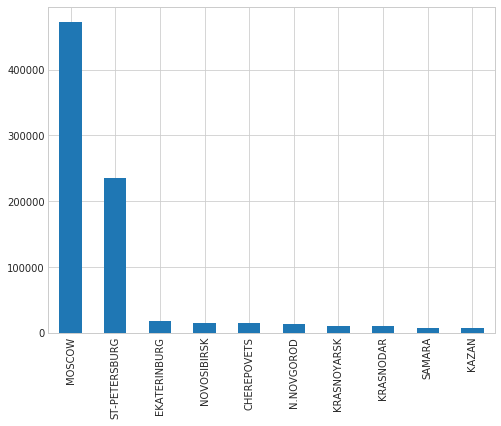

In [62]:
df = data
df.city = df.city.str.upper()

df = df.dropna(subset=['city'])

df.loc[df['city'].str.contains('MOS'), 'city'] = 'MOSCOW'
df.loc[df['city'].str.contains('PETER'), 'city'] = 'ST-PETERSBURG'
print(df.city.value_counts()[:20])
df.city.value_counts()[:10].plot.bar()

# Визуализация amount (количество потраченных средств за транзакцию)

Средняя величина 2.8289661387351566
Минимум -2.0123559735
Максимум 6.0753066117
Медиана 2.7383841766


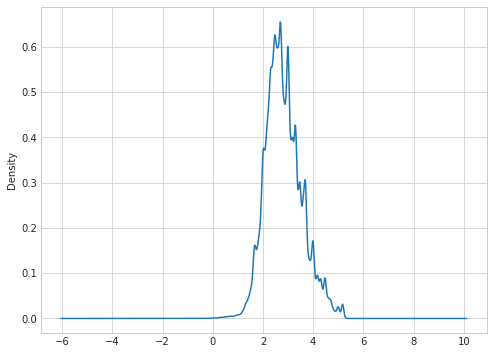

In [8]:
print('Средняя величина',np.mean(df.amount))
print('Минимум',np.min(df.amount))
print('Максимум',np.max(df.amount))
print('Медиана',np.median(df.amount))
amount = df.amount.sort_values()
amount.plot.kde()

# Корреляция данных

,amount,atm_address_lat,atm_address_lon,currency,home_add_lat,home_add_lon,mcc,pos_adress_lat,pos_adress_lon,work_add_lat,work_add_lon
amount,1.000000,0.013254,-0.026108,0.007926,-0.024575,-0.006199,0.289714,-0.002165,-0.027596,-0.020791,-0.012587
atm_address_lat,0.013254,1.000000,-0.192423,0.006407,0.938459,-0.190630,-0.000466,NaN,NaN,0.932853,-0.189188
atm_address_lon,-0.026108,-0.192423,1.000000,-0.037925,-0.195657,0.910023,-0.002810,NaN,NaN,-0.197612,0.869699
currency,0.007926,0.006407,-0.037925,1.000000,0.003672,-0.014765,0.026844,0.004288,0.001067,0.003635,-0.015624
home_add_lat,-0.024575,0.938459,-0.195657,0.003672,1.000000,-0.223150,-0.032242,0.835957,-0.210631,0.934096,-0.218533
home_add_lon,-0.006199,-0.190630,0.910023,-0.014765,-0.223150,1.000000,0.019733,-0.206620,0.844380,-0.220672,0.905515
mcc,0.289714,-0.000466,-0.002810,0.026844,-0.032242,0.019733,1.000000,-0.014112,0.007427,-0.028977,0.019338
pos_adress_lat,-0.002165,NaN,NaN,0.004288,0.835957,-0.206620,-0.014112,1.000000,-0.226036,0.832188,-0.196887
pos_adress_lon,-0.027596,NaN,NaN,0.001067,-0.210631,0.844380,0.007427,-0.226036,1.000000,-0.207334,0.820378
work_add_lat,-0.020791,0.932853,-0.197612,0.003635,0.934096,-0.220672,-0.028977,0.832188,-0.207334,1.000000,-0.227047


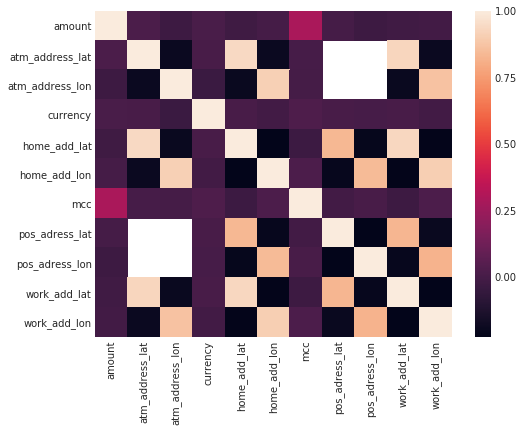

In [9]:
# ОЧИЩАЕТ ОКОЛО ПОЛОВИНЫ НАБОРА ДАННЫХ!!!
df = data[pd.notnull(data['home_add_lat'])]
df = data[pd.notnull(data['home_add_lon'])]
df = data[pd.notnull(data['work_add_lon'])]
df = data[pd.notnull(data['work_add_lon'])]
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

In [10]:
from datetime import datetime
df2 = data[pd.notnull(data['transaction_date'])]
df2['transaction_date'] = df2['transaction_date'].astype(str)
df2['transaction_date'] = df2['transaction_date'].apply(lambda x: int(datetime.strptime(x,'%Y-%m-%d').strftime('%s')) / (60 * 60))

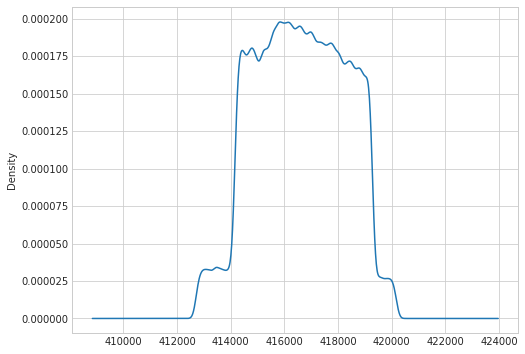

In [11]:
df2['transaction_date'].plot.kde()

# Предобработка данных

In [12]:
# Удаление незначащих колонок
df.transaction_date = df2.transaction_date
columns_to_delete = ['terminal_id', 'pos_address', 'atm_address']
df = df.drop(columns_to_delete, axis=1)

# Бинарная классификация принадлежности к стране
df.country = (df['country'] == "RUS").astype(int)

df.head()

,amount,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_adress_lat,pos_adress_lon,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,ST PETERSBURG,1,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,59.844072,30.179153,416684.0,59.847,30.177
1,2.775633,NaN,NaN,ST PETERSBURG,1,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,59.844072,30.179153,419180.0,59.847,30.177
2,3.708368,NaN,NaN,St Petersburg,1,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,59.858198,30.229024,418604.0,59.847,30.177
3,2.787498,NaN,NaN,ST PETERSBURG,1,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,59.844072,30.179153,418028.0,59.847,30.177
4,2.892510,NaN,NaN,ST PETERSBURG,1,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,59.844072,30.179153,416468.0,59.847,30.177


### Предобработка городов

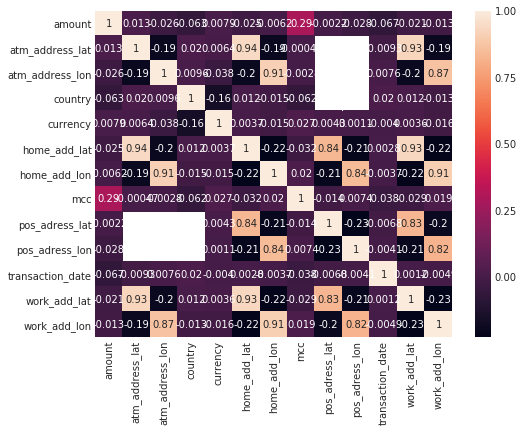

In [13]:
df_city = df
df_city.city = df_city.city.str.upper()

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

# Сохранение модели

In [14]:
df.to_csv('PreprocessData.csv')

In [ ]:
df_s = data
spend_lat = []
spend_lon = []

for index, row in df_s.iterrows():
    if (pd.notnull(row['pos_adress_lat']) and pd.notnull(row['pos_adress_lat'])):
        spend_lat.append(row['pos_adress_lat'])
        spend_lon.append(row['pos_adress_lon'])
    elif pd.notnull(row['pos_adress_lat']):
        spend_lat.append(row['pos_adress_lat'])
        spend_lon.append(row['pos_adress_lon'])
    elif pd.notnull(row['atm_address_lat']):
        spend_lat.append(row['atm_address_lat'])
        spend_lon.append(row['atm_address_lon'])
        
print(pd.notnull(data.atm_address_lat[1224709]))
print(pd.notnull(data.pos_adress_lat[1224709]))
print(pd.notnull(df_s.pos_adress_lat[1224709]))

In [ ]:
# columns_to_delete = ['terminal_id', 'pos_address', 'atm_address', 'currency',
#                      'atm_address_lon', 'atm_address_lat', 'pos_adress_lon', 'pos_adress_lat', 'mcc',
#                     'transaction_date']
# df_s = df_s.drop(columns_to_delete, axis=1)
df_s.city = df.city
df_s['spend_lat'] = pd.Series(spend_lat)
df_s['spend_lon'] = pd.Series(spend_lon)

# df_s = df_s[df_s.city.value_counts() > 100]
df_s.head()

In [64]:
df_s.to_csv('stage_process.csv')

In [4]:
geocoding = pd.read_csv('geocoding.csv', index_col=0)
geocoding.head()

,country,home_add_lat,home_add_lon,work_add_lat,work_add_lon,spend_lat,spend_lon,city_lat,city_lon
0,1.0,59.851,30.232,59.847,30.177,59.844072,30.179153,59.939095,30.315868
1,1.0,59.851,30.232,59.847,30.177,59.844072,30.179153,59.939095,30.315868
2,1.0,59.851,30.232,59.847,30.177,59.858198,30.229024,59.939095,30.315868
3,1.0,59.851,30.232,59.847,30.177,59.844072,30.179153,59.939095,30.315868
4,1.0,59.851,30.232,59.847,30.177,59.844072,30.179153,59.939095,30.315868


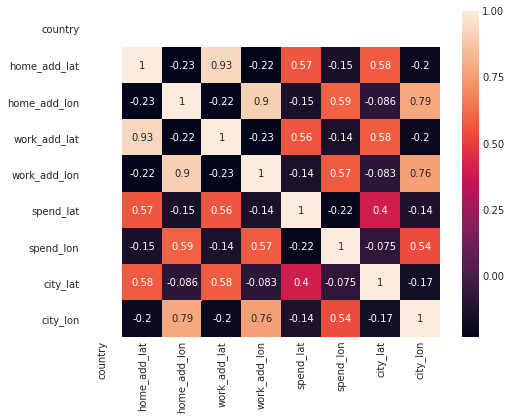

In [5]:
corr = geocoding.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)